In [1]:
import gc
import os
import pandas as pd
import torch
import transformers
from itertools import product
from experiments import run_threshold_experiment, run_supervised_experiment, run_perturbation_experiment
from graphics import plot_llr_hist, plot_roc_curves
from metrics import get_likelihood, get_rank, get_entropy
from perturbations import get_perturbation_stats, perturb_texts_chunked
from preprocessing import prepare_data

DEVICE = "cuda"

DATASET_SIZE = 5_000
N_SAMPLES = 200

IMG_FOLDER = "images"
if not os.path.exists(IMG_FOLDER):
    os.makedirs(IMG_FOLDER)

In [2]:
mask_model = transformers.AutoModelForSeq2SeqLM.from_pretrained("t5-large").to(DEVICE)
mask_tokenizer = transformers.AutoTokenizer.from_pretrained("t5-large")
perturb_fn = lambda texts: perturb_texts_chunked(mask_model, mask_tokenizer, texts, device=DEVICE)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
chosen_datasets = [
    ("xsum", "document"),
    ("squad", "context"),
]

base_models = [
    ("gpt2-medium", "gpt2-medium"),
    ("facebook/opt-125m", "opt-125m")
]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Running new experiment... Dataset: xsum, Model: gpt2-medium


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

xsum.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


(…)SUM-EMNLP18-Summary-Data-Original.tar.gz:   0%|          | 0.00/255M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Computing xsum_gpt2-medium_likelihood: 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]


ROC AUC: 0.93535, PR AUC: 0.9160139007055477


Computing xsum_gpt2-medium_rank: 100%|██████████| 4/4 [00:14<00:00,  3.73s/it]


ROC AUC: 0.83405, PR AUC: 0.8541681991125394


Computing xsum_gpt2-medium_logrank: 100%|██████████| 4/4 [00:14<00:00,  3.73s/it]


ROC AUC: 0.9626250000000001, PR AUC: 0.9533362277238129


Computing xsum_gpt2-medium_entropy: 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]


ROC AUC: 0.5973999999999999, PR AUC: 0.5715949516487042


config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Evaluating sampled: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]


ROC AUC: 0.9954250000000001, PR AUC: 0.9954747166459437


config.json:   0%|          | 0.00/519 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Evaluating sampled: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


ROC AUC: 1.0, PR AUC: 1.0


Computing perturbation stats: 100%|██████████| 200/200 [00:25<00:00,  7.88it/s]


ROC AUC: 0.692175, PR AUC: 0.7001188077723235


<Figure size 640x480 with 0 Axes>

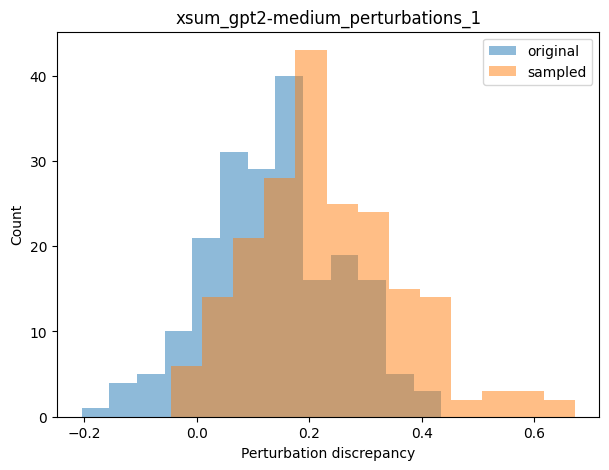

Computing perturbation stats: 100%|██████████| 200/200 [02:14<00:00,  1.48it/s]

ROC AUC: 0.8507999999999999, PR AUC: 0.8460945198392777


<Figure size 640x480 with 0 Axes>

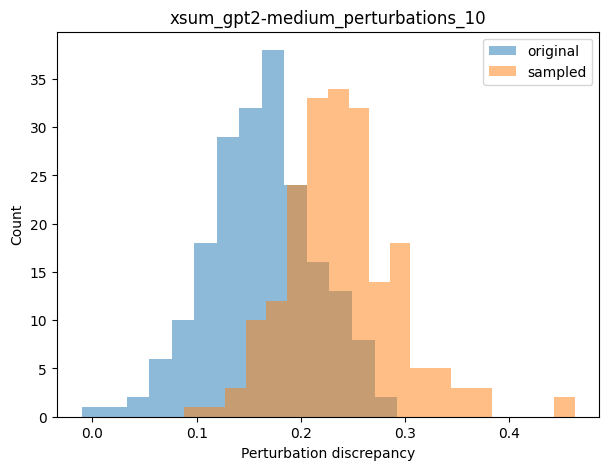

Computing perturbation stats: 100%|██████████| 200/200 [20:31<00:00,  6.16s/it]


ROC AUC: 0.9118, PR AUC: 0.9096765357138272


<Figure size 640x480 with 0 Axes>

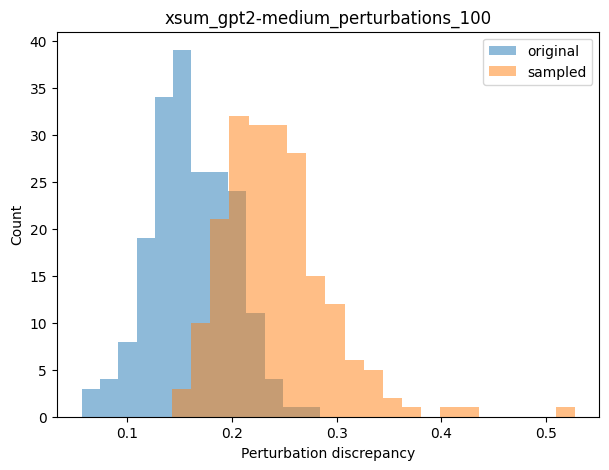

xsum_gpt2-medium_likelihood_threshold roc_auc: 0.935
xsum_gpt2-medium_rank_threshold roc_auc: 0.834
xsum_gpt2-medium_logrank_threshold roc_auc: 0.963
xsum_gpt2-medium_entropy_threshold roc_auc: 0.597
xsum_gpt2-medium_roberta-base-openai-detector_supervised roc_auc: 0.995
xsum_gpt2-medium_roberta-large-openai-detector_supervised roc_auc: 1.000
xsum_gpt2-medium_perturbations_1_perturbations roc_auc: 0.692
xsum_gpt2-medium_perturbations_10_perturbations roc_auc: 0.851
xsum_gpt2-medium_perturbations_100_perturbations roc_auc: 0.912


<Figure size 640x480 with 0 Axes>

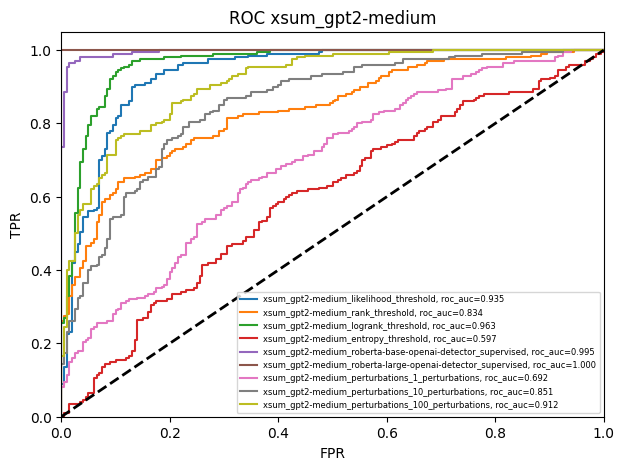

Running new experiment... Dataset: squad, Model: gpt2-medium


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (664 > 512). Running this sequence through the model will result in indexing errors
Computing squad_gpt2-medium_likelihood: 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]


ROC AUC: 0.968475, PR AUC: 0.968817678307126


Computing squad_gpt2-medium_rank: 100%|██████████| 4/4 [00:15<00:00,  3.80s/it]


ROC AUC: 0.8650499999999999, PR AUC: 0.8913127717913678


Computing squad_gpt2-medium_logrank: 100%|██████████| 4/4 [00:15<00:00,  3.80s/it]


ROC AUC: 0.991525, PR AUC: 0.9919344406810605


Computing squad_gpt2-medium_entropy: 100%|██████████| 4/4 [00:13<00:00,  3.37s/it]


ROC AUC: 0.525975, PR AUC: 0.505099244402853


Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check t

ROC AUC: 0.9929874999999999, PR AUC: 0.9929369333533048


Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check 

ROC AUC: 0.998725, PR AUC: 0.9986475024187076


Computing perturbation stats: 100%|██████████| 200/200 [00:25<00:00,  7.78it/s]


ROC AUC: 0.7540500000000001, PR AUC: 0.7387979098541633


<Figure size 640x480 with 0 Axes>

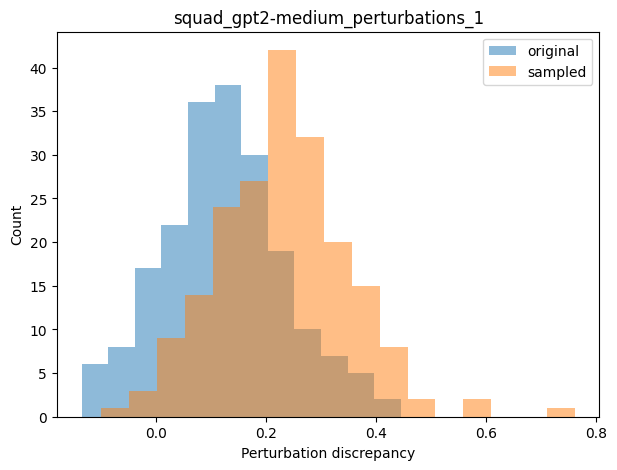

Computing perturbation stats: 100%|██████████| 200/200 [02:16<00:00,  1.46it/s]


ROC AUC: 0.902625, PR AUC: 0.8866134203182077


<Figure size 640x480 with 0 Axes>

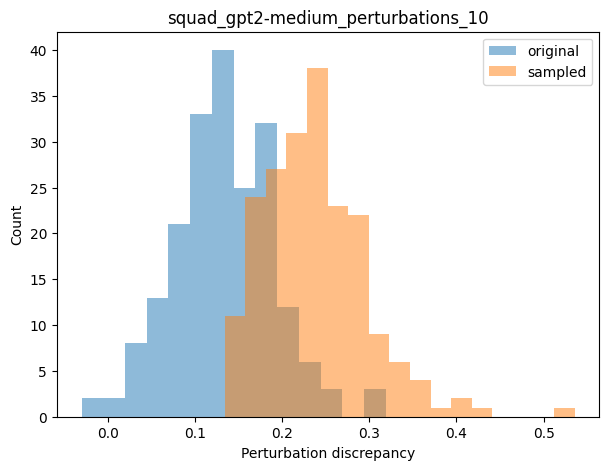

Computing perturbation stats: 100%|██████████| 200/200 [20:51<00:00,  6.26s/it]


ROC AUC: 0.93805, PR AUC: 0.9327879319462659


<Figure size 640x480 with 0 Axes>

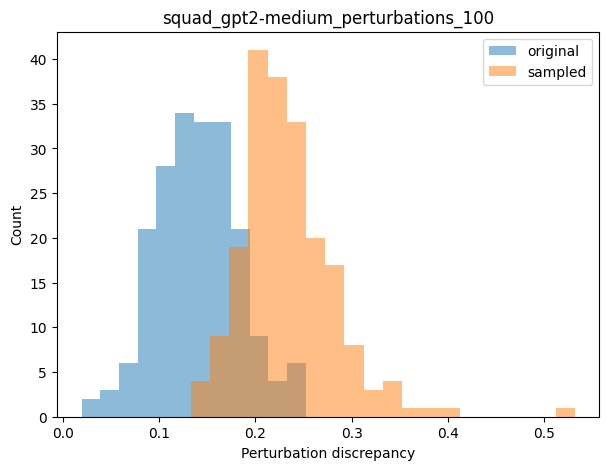

squad_gpt2-medium_likelihood_threshold roc_auc: 0.968
squad_gpt2-medium_rank_threshold roc_auc: 0.865
squad_gpt2-medium_logrank_threshold roc_auc: 0.992
squad_gpt2-medium_entropy_threshold roc_auc: 0.526
squad_gpt2-medium_roberta-base-openai-detector_supervised roc_auc: 0.993
squad_gpt2-medium_roberta-large-openai-detector_supervised roc_auc: 0.999
squad_gpt2-medium_perturbations_1_perturbations roc_auc: 0.754
squad_gpt2-medium_perturbations_10_perturbations roc_auc: 0.903
squad_gpt2-medium_perturbations_100_perturbations roc_auc: 0.938


<Figure size 640x480 with 0 Axes>

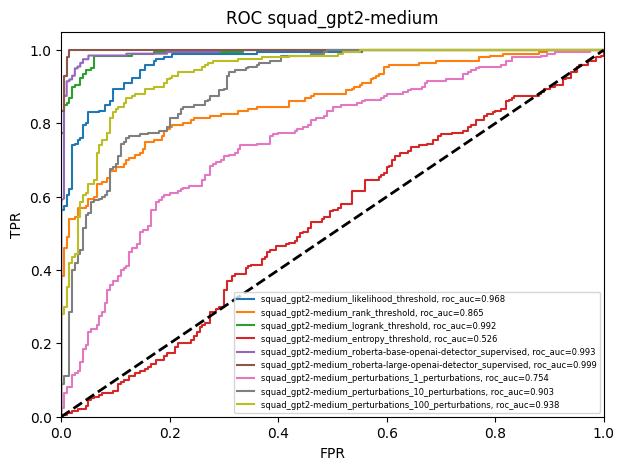

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Running new experiment... Dataset: xsum, Model: opt-125m


Token indices sequence length is longer than the specified maximum sequence length for this model (633 > 512). Running this sequence through the model will result in indexing errors
Computing xsum_opt-125m_likelihood: 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]


ROC AUC: 0.98885, PR AUC: 0.986335798002624


Computing xsum_opt-125m_rank: 100%|██████████| 4/4 [00:08<00:00,  2.22s/it]


ROC AUC: 0.841, PR AUC: 0.8537166762650763


Computing xsum_opt-125m_logrank: 100%|██████████| 4/4 [00:08<00:00,  2.22s/it]


ROC AUC: 0.9927750000000001, PR AUC: 0.9903389119148054


Computing xsum_opt-125m_entropy: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


ROC AUC: 0.3675, PR AUC: 0.42790663661995637


Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check t

ROC AUC: 0.99985, PR AUC: 0.9998514674176462


Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check 

ROC AUC: 1.0, PR AUC: 1.0


Computing perturbation stats: 100%|██████████| 200/200 [00:13<00:00, 14.65it/s]


ROC AUC: 0.7220999999999999, PR AUC: 0.6789576345096024


<Figure size 640x480 with 0 Axes>

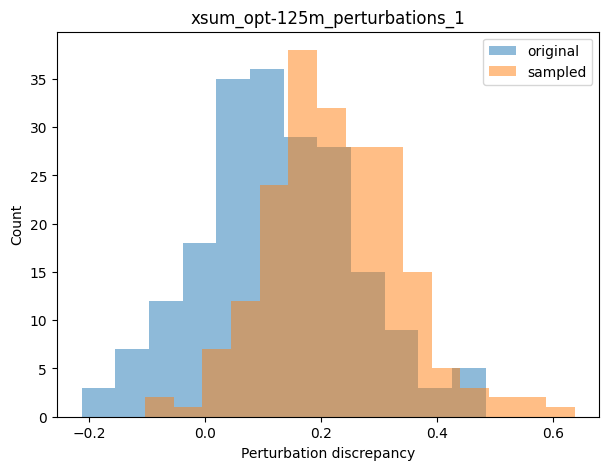

Computing perturbation stats: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]


ROC AUC: 0.915475, PR AUC: 0.911415385854352


<Figure size 640x480 with 0 Axes>

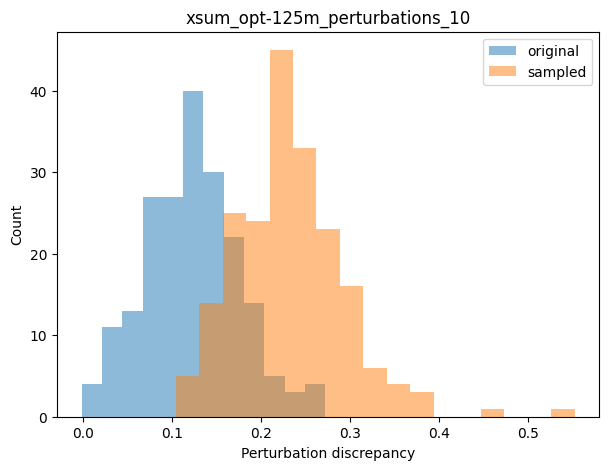

Computing perturbation stats: 100%|██████████| 200/200 [11:13<00:00,  3.37s/it]


ROC AUC: 0.968325, PR AUC: 0.9699793940413115


<Figure size 640x480 with 0 Axes>

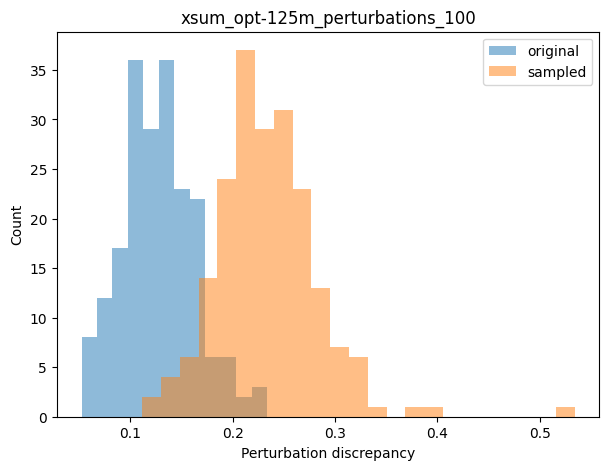

xsum_opt-125m_likelihood_threshold roc_auc: 0.989
xsum_opt-125m_rank_threshold roc_auc: 0.841
xsum_opt-125m_logrank_threshold roc_auc: 0.993
xsum_opt-125m_entropy_threshold roc_auc: 0.367
xsum_opt-125m_roberta-base-openai-detector_supervised roc_auc: 1.000
xsum_opt-125m_roberta-large-openai-detector_supervised roc_auc: 1.000
xsum_opt-125m_perturbations_1_perturbations roc_auc: 0.722
xsum_opt-125m_perturbations_10_perturbations roc_auc: 0.915
xsum_opt-125m_perturbations_100_perturbations roc_auc: 0.968


<Figure size 640x480 with 0 Axes>

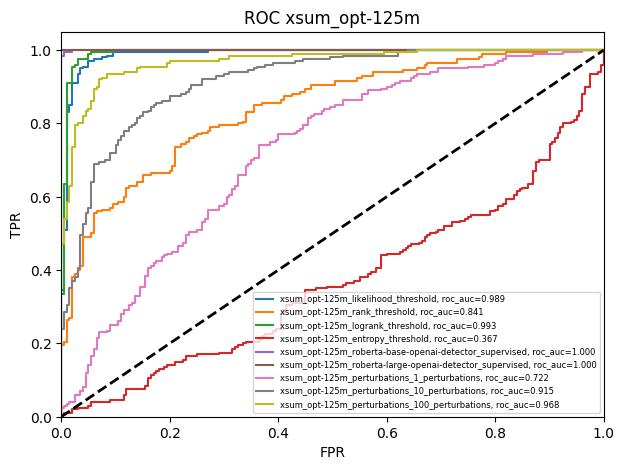

Running new experiment... Dataset: squad, Model: opt-125m


Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Computing squad_opt-125m_likelihood: 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]


ROC AUC: 0.999025, PR AUC: 0.999031260077192


Computing squad_opt-125m_rank: 100%|██████████| 4/4 [00:09<00:00,  2.26s/it]


ROC AUC: 0.897725, PR AUC: 0.9149111576781079


Computing squad_opt-125m_logrank: 100%|██████████| 4/4 [00:09<00:00,  2.26s/it]


ROC AUC: 0.99985, PR AUC: 0.9998508607757336


Computing squad_opt-125m_entropy: 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]


ROC AUC: 0.35997499999999993, PR AUC: 0.4041778552780294


Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check t

ROC AUC: 0.9976499999999999, PR AUC: 0.9971305455702213


Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check 

ROC AUC: 0.99995, PR AUC: 0.9999499993749844


Computing perturbation stats: 100%|██████████| 200/200 [00:13<00:00, 14.46it/s]


ROC AUC: 0.79625, PR AUC: 0.8034996606540841


<Figure size 640x480 with 0 Axes>

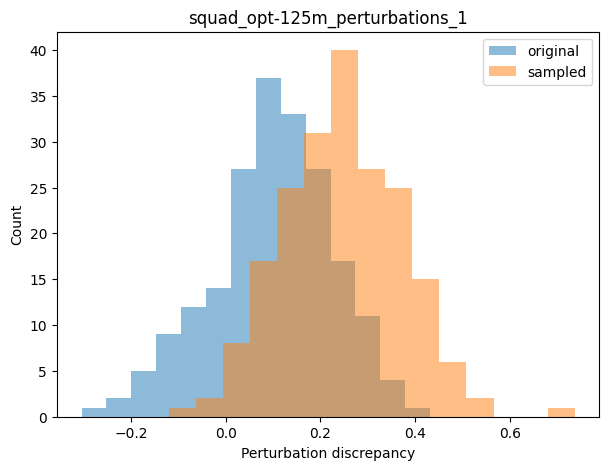

Computing perturbation stats: 100%|██████████| 200/200 [01:14<00:00,  2.68it/s]

ROC AUC: 0.9428000000000001, PR AUC: 0.9452144648008638


<Figure size 640x480 with 0 Axes>

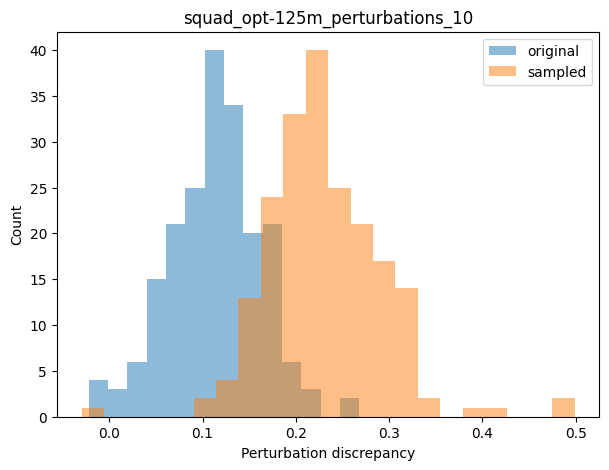

Computing perturbation stats: 100%|██████████| 200/200 [11:21<00:00,  3.41s/it]


ROC AUC: 0.9828, PR AUC: 0.983342460173713


<Figure size 640x480 with 0 Axes>

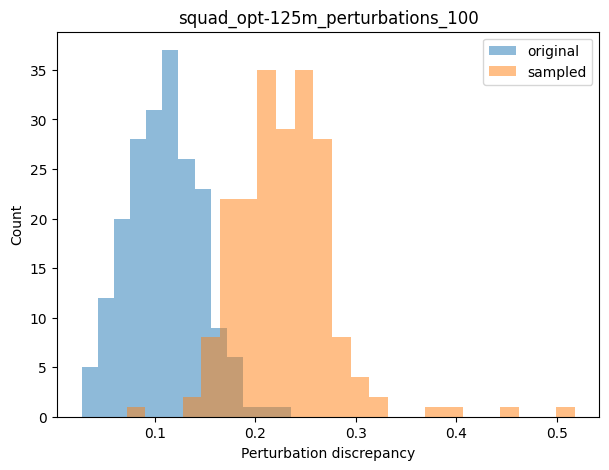

squad_opt-125m_likelihood_threshold roc_auc: 0.999
squad_opt-125m_rank_threshold roc_auc: 0.898
squad_opt-125m_logrank_threshold roc_auc: 1.000
squad_opt-125m_entropy_threshold roc_auc: 0.360
squad_opt-125m_roberta-base-openai-detector_supervised roc_auc: 0.998
squad_opt-125m_roberta-large-openai-detector_supervised roc_auc: 1.000
squad_opt-125m_perturbations_1_perturbations roc_auc: 0.796
squad_opt-125m_perturbations_10_perturbations roc_auc: 0.943
squad_opt-125m_perturbations_100_perturbations roc_auc: 0.983


<Figure size 640x480 with 0 Axes>

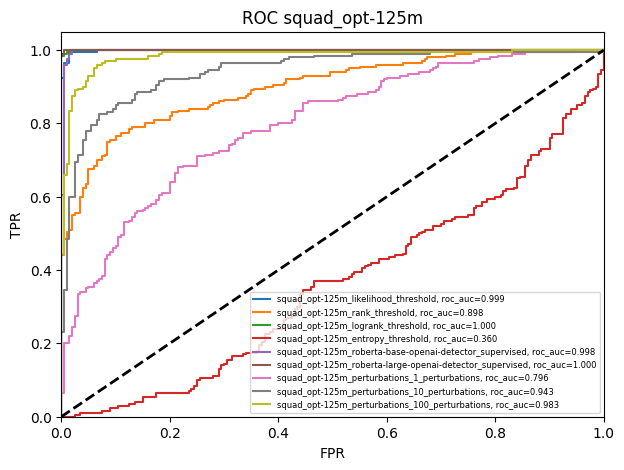

In [4]:
all_experiments = []
for base_model_path, base_model_name in base_models:
    base_model = transformers.AutoModelForCausalLM.from_pretrained(base_model_path).to(DEVICE)
    base_tokenizer = transformers.AutoTokenizer.from_pretrained(base_model_path)
    base_tokenizer.pad_token_id = base_tokenizer.eos_token_id

    ll_fn = lambda text: get_likelihood(base_model, base_tokenizer, text, DEVICE)
    rank_fn = lambda text: -get_rank(base_model, base_tokenizer, text, DEVICE, log=False)
    logrank_fn = lambda text: -get_rank(base_model, base_tokenizer, text, DEVICE, log=True)
    entropy_fn = lambda text: get_entropy(base_model, base_tokenizer, text, DEVICE)

    for dataset_name, dataset_col in chosen_datasets:
        print("============================================================================")
        print(f"Running new experiment... Dataset: {dataset_name}, Model: {base_model_name}")
        print("============================================================================")
        data = prepare_data(dataset_name, dataset_col, base_model, base_tokenizer, device=DEVICE, dataset_size=DATASET_SIZE, n_samples=N_SAMPLES)

        exp_name = f"{dataset_name}_{base_model_name}"
        experiments = []

        experiments.append(run_threshold_experiment(ll_fn, f"{exp_name}_likelihood", data, n_samples=N_SAMPLES))
        experiments.append(run_threshold_experiment(rank_fn, f"{exp_name}_rank", data, n_samples=N_SAMPLES))
        experiments.append(run_threshold_experiment(logrank_fn, f"{exp_name}_logrank", data, n_samples=N_SAMPLES))
        experiments.append(run_threshold_experiment(entropy_fn, f"{exp_name}_entropy", data, n_samples=N_SAMPLES))
        experiments.append(run_supervised_experiment("roberta-base-openai-detector", data, exp_name, device=DEVICE, n_samples=N_SAMPLES))
        experiments.append(run_supervised_experiment("roberta-large-openai-detector", data, exp_name, device=DEVICE, n_samples=N_SAMPLES))

        for n_perturbations in (1, 10, 100):
            perturbation_stats = get_perturbation_stats(perturb_fn, ll_fn, data, n_perturbations=n_perturbations)
            experiments.append(run_perturbation_experiment(perturbation_stats, f"{exp_name}_perturbations_{n_perturbations}"))
            plot_llr_hist(perturbation_stats, name=f"{exp_name}_perturbations_{n_perturbations}", img_folder=IMG_FOLDER)

        plot_roc_curves(experiments, name=exp_name, img_folder=IMG_FOLDER)
        all_experiments += experiments
    del base_model, base_tokenizer
    gc.collect()
    torch.cuda.empty_cache()

In [5]:
res = {"model": [], "dataset": [], "n_perturbations": [], "roc_auc": []}
for exp in all_experiments:
    if "perturbations" in exp["name"]:
        dataset, model, _, n_perturbations = exp["name"].split("_")[:4]
        res["model"].append(model)
        res["dataset"].append(dataset)
        res["n_perturbations"].append(n_perturbations)
        res["roc_auc"].append(exp["roc_auc"])
df = pd.DataFrame(res)
df.head(48)

,model,dataset,n_perturbations,roc_auc
0,gpt2-medium,xsum,1,0.692175
1,gpt2-medium,xsum,10,0.850800
2,gpt2-medium,xsum,100,0.911800
3,gpt2-medium,squad,1,0.754050
4,gpt2-medium,squad,10,0.902625
5,gpt2-medium,squad,100,0.938050
6,opt-125m,xsum,1,0.722100
7,opt-125m,xsum,10,0.915475
8,opt-125m,xsum,100,0.968325
9,opt-125m,squad,1,0.796250


In [6]:
df.to_excel("results.xlsx", index=False)